## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:
A straight-plane fit is a model of the form

$$
\large y = \large \beta + \large \alpha_1 x_1 + \large \alpha_2 x_2 +...+ \large \alpha_n x_n
$$

where:
<br>$\alpha_i$ is commonly known as the *slope* in multiple dimensions that makes up a plane
<br>$\beta$ is commonly known as the *intercept*. 

Extending each sample with an intercept xi := [1, xi] ∈ RP+1 allows us to use a more general notation based on linear algebra and write it as a simple dot product:
y ( x i , β ) = x iT β ,

<img src="../img/reg6.png" width="900">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Code Dictionary
code | description
-----|------------
`read_csv(file)` | Using the Pandas library, create a dataframe for the dataset
`.loc()` | Access a group of rows and columns by label(s) or a boolean array.
`mean_squared_error` | Scikitlearn fuction to calculate the mean squared error
`r2_score` | Scikitlearn fuction to calculate the r2 score
`statsmodels` | Library for in depth statistical analysis.
`math` | Library for in mathematical operations.
`.OLS(y, X)` | Ordinary least squares aka linear regression.
`.RFECV(model, folds)` | Automatic selection of the best number of features.

Let's take an already known dataset

The data itself is extracted from [Inside Airbnb](http://insideairbnb.com) where is possible to make a very nice visual analysis following the hypothesis: Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. However, data shows that the majority of Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities.

In [2]:
dataset = pd.read_csv('../datasets/airbnb_amsterdam.csv')

In [3]:
dataset.head()

,Unnamed: 0,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1,156,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1,126,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
2,2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1,132,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592
3,3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1,121,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028
4,4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1,93,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 16 columns):
Unnamed: 0              18694 non-null int64
room_id                 18694 non-null int64
survey_id               18694 non-null int64
host_id                 18694 non-null int64
room_type               18694 non-null object
city                    18694 non-null object
neighborhood            18694 non-null object
reviews                 18694 non-null int64
overall_satisfaction    18694 non-null float64
accommodates            18694 non-null int64
bedrooms                18694 non-null int64
price                   18694 non-null int64
name                    18642 non-null object
last_modified           18694 non-null object
latitude                18694 non-null float64
longitude               18694 non-null float64
dtypes: float64(3), int64(8), object(5)
memory usage: 2.3+ MB


#### What do we want to predict?
Seperate out the target variable and features

In [5]:
features = ['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms']

In [6]:
X = dataset[features]
y = dataset.price

In [7]:
y.mean()

164.8257194821868

Learning a multiple regression model
Recall we can use the following code to learn a multiple regression model predicting 'price' based on the following features: example_features = ['sqft_living', 'bedrooms', 'bathrooms'] on training data with the following code:

#### What are the Machine Learning steps?

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

$$
\large y = \large \beta + \large \alpha_1 x_1 + \large \alpha_2 x_2 +...+ \large \alpha_n x_n
$$


Then, fit the model to all the features in the data

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's create new airbnb values and predict

In [14]:
new_appartment = pd.DataFrame({'reviews':[40],
                               'overall_satisfaction':[5],
                               'accommodates':[2],
                               'bedrooms':[2]})

In [15]:
new_appartment

,reviews,overall_satisfaction,accommodates,bedrooms
0,40,5,2,2


In [16]:
new_price = model.predict(new_appartment)
print ("Predicted Airbnb Value: € {}".format(new_price[0]))

Predicted Airbnb Value: € 152.9711341882695


#### Exploring more features

Although we often think of multiple regression as including multiple different features, we can also consider transformations of existing features e.g. the log of the accommodates.

You will use the logarithm function to create a new feature. so first you should import it from the math library.

In [17]:
from math import log, sqrt

Create the following 2 new features as column in both TEST and TRAIN data:

bedrooms_squared = bedrooms*bedrooms  
log_accommodates = log(accomodaties)

In [20]:
X_train['bedrooms_squared'] = X_train['bedrooms']*X_train['bedrooms']
X_test['bedrooms_squared'] = X_test['bedrooms']*X_test['bedrooms']
X_train['log_accommodates'] = [log(float(i)) for i in X_train['accommodates']]
X_test['log_accommodates'] = [log(float(i)) for i in X_test['accommodates']]

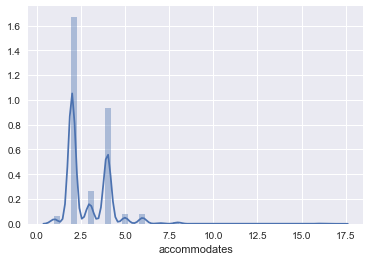

In [19]:
sns.distplot(X_train['accommodates'])

Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this feature will mostly affect houses with many bedrooms.
Taking the log of squarefeet has the effect of bringing large values closer together and spreading out small values.

#### Features Analysis and Selection
Now we will learn the weights for two (nested) model configuration for predicting prices. The first model will have the fewest features the second model will add the rest.

In [22]:
model_1_features = ['reviews','overall_satisfaction']
model_2_features = model_1_features + ['bedrooms_squared','log_accommodates']

Now we train with the new selections

In [23]:
model_1 = LinearRegression()
model_1.fit(X_train[model_1_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
model_1.coef_

array([-0.24397798, -0.49686217])

In [25]:
model_2 = LinearRegression()
model_2.fit(X_train[model_2_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model_2.coef_

array([-0.14282294,  0.58299603,  5.14630025, 90.34875174])

In [30]:
predictions_1 = model_1.predict(X_test[model_1_features])
predictions_2 = model_2.predict(X_test[model_2_features])

In [38]:
print ('real value: {}\npredicted value: {}'.format(
    y_test.values[10], predictions_1[10]))

real value: 107
predicted value: 162.6804409351625


In [35]:
predictions_1

array([162.92441892, 170.28383636, 165.36419876, ..., 165.85215473,
       167.55554752, 129.74341306])

## Cross Validation
<img src="../img/cvali.png" width="900">

In [42]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(model, X_train, y_train, cv=5)

Text(0,0.5,'Predicted')

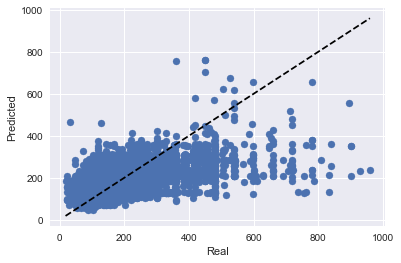

In [45]:
plt.scatter(y_train, predicted)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel('Real')
plt.ylabel('Predicted')

How do we know how good are the models?

## Regression Metrics
(goodness of fit)

### Mean Squared Error

Mean Squared Error(MSE) is the average of the square between the Original Values and the Predicted Values.It gives an idea of how wrong the predictions were.

$$\Large MSE = \frac{1}{N} \sum\limits_{i = 1}^{N} ( {y_i - \hat{y_i}} )^2$$

$$ MSE = Average(Actual\ target\ value - Predicted\ target\ value)^2$$

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
mse1 = mean_squared_error(y_test, predictions_1)
mse2 = mean_squared_error(y_test, predictions_2)

The squared root will give a better perspective

In [50]:
print(sqrt(mse1), sqrt(mse2))

86.09530401918047 71.11677415292911


In [51]:
dataset.price.mean()

164.8257194821868

What does this mean?

<img src="../img/reg1.png" width="800">

### R Squared

The $R^2$ (or R Squared) metric provides an indication of how well the model captures the variance in the data. It ranges between 0 and 1 for no-variance explained to complete variance captured respectively.

$$(Residual\ Square\ sum)\ RSS = \sum\limits_{i = 1}^{N} (Actual\ target\ value - Predicted\ target\ value)$$

$$(Total\ Square\ sum)\ TSS = \sum\limits_{i = 1}^{N} (Actual\ target\ value - Mean\ target\ value)$$

$$\Large R^2 = \Large (1 - \frac{RSS}{TSS})$$

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score1 = r2_score(y_test, predictions_1)
r2_score2 = r2_score(y_test, predictions_2)

In [55]:
print(r2_score1, r2_score2)

0.008267011503395372 0.3233253149668426


Text(0,0.5,'R2 Score')

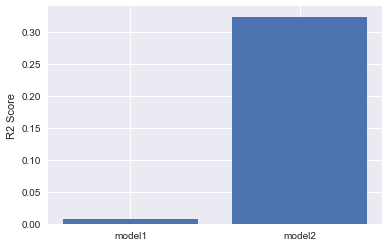

In [56]:
plt.bar([1,2], [r2_score1, r2_score2])
plt.xticks([1,2], ['model1','model2'])
plt.ylabel('R2 Score')

The closest to one the better otherwise isn't explaining the variance of the errors.

How to select the most relevant features for prediction?

### Recursive Feature Elimination - Cross Validation

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

In [58]:
from sklearn.feature_selection import RFECV

In [59]:
lr = LinearRegression()
selector = RFECV(lr,cv=5) # n fold cross validation
selector.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [60]:
selector.support_

array([ True,  True,  True,  True,  True,  True])

In [61]:
optimized_columns = X_train.columns[selector.support_]
optimized_columns

Index(['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'bedrooms_squared', 'log_accommodates'],
      dtype='object')

In [62]:
selector.ranking_

array([1, 1, 1, 1, 1, 1])

### Score distribution

In [65]:
model_scores = []
for repetition in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_predict))
    model_scores.append(rmse)

In [66]:
model_scores

[74.65930480501446,
 73.12915968237148,
 70.1786497229411,
 75.81261988367487,
 72.19648083550507,
 70.43654307808129,
 71.95973103402768,
 69.83783080157956,
 70.03915196600992,
 72.38964060899502,
 74.16910963663946,
 73.60805344832683,
 73.46586136902368,
 72.76067664161422,
 73.07624391128445,
 72.93745153843106,
 73.421464065609,
 69.55119721674117,
 70.72091701399307,
 69.95502741002878,
 72.28482491712741,
 70.47661427067834,
 72.07860610734873,
 70.35650175505715,
 69.7373619900328,
 72.39438626862646,
 72.62338631381412,
 69.4795910515223,
 72.5794283863447,
 69.77153647483911,
 69.17100101540872,
 76.1670332943517,
 70.56219241664385,
 73.73783301663718,
 72.68411324729615,
 69.83118644364474,
 75.01827504031382,
 73.40343896373852,
 70.02614623911354,
 69.24830745832364,
 71.44431410031362,
 70.19734639833271,
 69.63560216146176,
 72.62545115398274,
 72.56695117073984,
 71.83494336515749,
 73.02927183774074,
 69.28747696505064,
 74.99427501999254,
 71.45690256215126,
 71.985

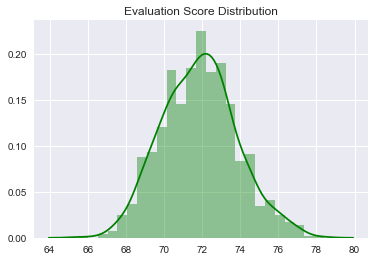

In [64]:
plt.title('Evaluation Score Distribution')
sns.distplot(model_scores, color="g")

### Pros and Cons of Regression Evaluation Metrics
RMSE is the better choice if we only care about model accuracy.  
Any metric such like MAE which doesn’t take the square of the difference is more robust to outliers.  
Any square of error term metric should be more useful when large errors are particularly undesirable.  

## Statmodels

There is always the classical version of regression on a python implementation

In [67]:
import statsmodels.formula.api as sm

In [68]:
regressor_OLS = sm.OLS(endog = y, exog=X).fit()

In [69]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 2.517e+04
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:43:47   Log-Likelihood:            -1.0701e+05
No. Observations:               18694   AIC:                         2.140e+05
Df Residuals:                   18690   BIC:                         2.141e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
reviews                 -0.1044      0.017     -6.107      0.000      -0.138      -0.071
overall_satisfaction     5.1452      0.222     23.125      0.000       4.709       5.581
accommodates            36.3938      0.506     71.892      0.000      35.402      37.386
bedrooms                26.0998      0.884     29.527      0.000      24.367      27.832
==============================================================================
Omnibus:                     7442.954   Durbin-Watson:                   1.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89616.171
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                      13.253   Cond. No.                         68.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""